# DATA 606: Capstone in Data Science

## **Project Title:** Parking Space Predictor

**Prepared for:** UMBC Data Science Master Degree Capstone by Dr. Chaojie (Jay) Wang

**Author Name:** Viral Harishkumar Jani

**Link to the author's GitHub profile:** [Viral Github](https://github.com/DATA-606-2023-FALL-MONDAY/Jani_Viral)

**Link to the author's LinkedIn profile:** [Viral LinkedIn](https://www.linkedin.com/in/viral-jani-8137081a2/)

## **Background**
**Why choose this project?**

Parking in urban areas is increasingly becoming a challenge due to the growing number of vehicles and limited space. The ability to predict parking availability can significantly reduce the time drivers spend searching for parking, leading to reduced congestion and carbon emissions.

**What is it about?**

The project aims to develop a model that predicts parking space availability in real-time, using data from parking lot sensors and other external factors like events, traffic data, and historical parking trends.

**Why does it matter?**

Such a predictive system can:
- Save time for drivers.
- Reduce fuel consumption and emissions.
- Aid city planners in understanding parking demand.
- Support the development of smart city initiatives.

**Research Questions:**

- Can we accurately predict parking availability in real-time?

- Which factors most influence parking availability?

- How does the prediction accuracy vary by time of day, day of the week, or specific events?

**Data Source:**

Parking lot: https://web.inf.ufpr.br/vri/databases/parking-lot-database/

CNRPark: http://cnrpark.it/dataset/CNRPark-Patches-150x150.zip

CNR-EXT: http://cnrpark.it/dataset/CNR-EXT-Patches-150x150.zip


**Data Description:**

The dataset consists of the following columns:

- **camera:** The camera that took the photo.
- **datetime:** The timestamp when the photo was taken.
- **day:** Day of the month.
- **hour:** Hour of the day.
- **image_url:** URL of the image.
- **minute:** Minute of the hour.
- **month:** Month of the year.
- **occupancy:** Whether the parking slot is occupied (1) or free (0).
- **slot_id:** The ID of the parking slot.
- **weather:** Weather condition at the time the photo was taken.
- **year:** Year when the photo was taken.
- **occupant_changed:** Indicates if the occupant changed compared to the previous snapshot

In [8]:
import pandas as pd

# Load the CSV file into a DataFrame
data = pd.read_csv('CNRPark+EXT.csv')

# Display the first few rows to understand its structure
data.head()

<ipython-input-8-77b4c49a35db>:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('CNRPark+EXT.csv')


,camera,datetime,day,hour,image_url,minute,month,occupancy,slot_id,weather,year,occupant_changed
0,A,20150703_0805,3,8,CNRPark/A/free/20150703_0805_1.jpg,5,7,0,1,S,2015,NaN
1,A,20150703_0810,3,8,CNRPark/A/free/20150703_0810_1.jpg,10,7,0,1,S,2015,NaN
2,A,20150703_0815,3,8,CNRPark/A/busy/20150703_0815_1.jpg,15,7,1,1,S,2015,0.0
3,A,20150703_0820,3,8,CNRPark/A/busy/20150703_0820_1.jpg,20,7,1,1,S,2015,0.0
4,A,20150703_0825,3,8,CNRPark/A/busy/20150703_0825_1.jpg,25,7,1,1,S,2015,0.0


#### Let's proceed with the EDA for a small chunk of data.
For EDA, we will do look into the following:
- **General statistics:** To understand the distribution of data.
- **Missing values:** To identify if there are any missing values.
- **Distribution of occupancy:** To see how often parking slots are occupied vs. free.
- **Occupancy by camera:** To see if there's a significant difference in occupancy rates across different cameras.
- **Occupancy over time:** To identify any patterns or trends over the course of the day or month.

### General Stats

In [9]:
# Slice the first 12,585 rows for EDA
data_eda = data.iloc[:12584]

# General statistics
general_stats = data_eda.describe(include='all')

general_stats

,camera,datetime,day,hour,image_url,minute,month,occupancy,slot_id,weather,year,occupant_changed
count,12584,12584,12584.000000,12584.000000,12584,12584.000000,12584.0,12584.000000,12584.000000,12584,12584.0,8402.000000
unique,2,242,NaN,NaN,12584,NaN,NaN,NaN,NaN,1,NaN,NaN
top,B,20150708_0805,NaN,NaN,CNRPark/A/free/20150703_0805_1.jpg,NaN,NaN,NaN,NaN,S,NaN,NaN
freq,6413,53,NaN,NaN,1,NaN,NaN,NaN,NaN,12584,NaN,NaN
mean,NaN,NaN,5.548077,12.628099,NaN,27.314050,7.0,0.667673,26.509615,NaN,2015.0,0.000119
std,NaN,NaN,2.499637,2.915258,NaN,17.309756,0.0,0.471066,15.025573,NaN,0.0,0.010910
min,NaN,NaN,3.000000,8.000000,NaN,0.000000,7.0,0.000000,1.000000,NaN,2015.0,0.000000
25%,NaN,NaN,3.000000,10.000000,NaN,10.000000,7.0,0.000000,13.750000,NaN,2015.0,0.000000
50%,NaN,NaN,8.000000,13.000000,NaN,25.000000,7.0,1.000000,26.500000,NaN,2015.0,0.000000
75%,NaN,NaN,8.000000,15.000000,NaN,40.000000,7.0,1.000000,39.250000,NaN,2015.0,0.000000


**camera:** There are 2 unique cameras (A, B) represented in the dataset with the highest frequency from camera 'B'.

**year:** All the records are from the year 2015.

**occupancy:** About 67% of the recorded slots are occupied.

**slot_id:** There are 184 unique slots recorded in the dataset. This means that there are 184 slots for the car to park.


### Missing Values

In [10]:
# Check for missing values
missing_values = data_eda.isnull().sum()

missing_values


camera                 0
datetime               0
day                    0
hour                   0
image_url              0
minute                 0
month                  0
occupancy              0
slot_id                0
weather                0
year                   0
occupant_changed    4182
dtype: int64

The "occupant_changed" column has 4,183 missing entries, which could be because there is no previous snapshot to compare to, or the data was not captured for some reason.

## Visualizations

### **Distribution of occupancy:** To see how often parking slots are occupied vs. free.

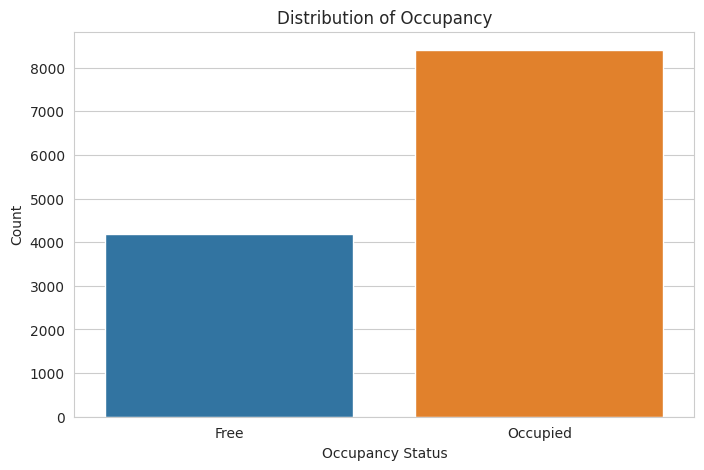

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for the plots
sns.set_style("whitegrid")

# Distribution of Occupancy
plt.figure(figsize=(8, 5))
sns.countplot(x='occupancy', data=data_eda)
plt.title('Distribution of Occupancy')
plt.xticks(ticks=[0, 1], labels=['Free', 'Occupied'])
plt.xlabel('Occupancy Status')
plt.ylabel('Count')
plt.show()


The distribution of occupancy shows that there are more occupied parking slots than free slots in the chunk of data that I have chosen.

### **Occupancy by camera:** To see if there's a significant difference in occupancy rates across different cameras.

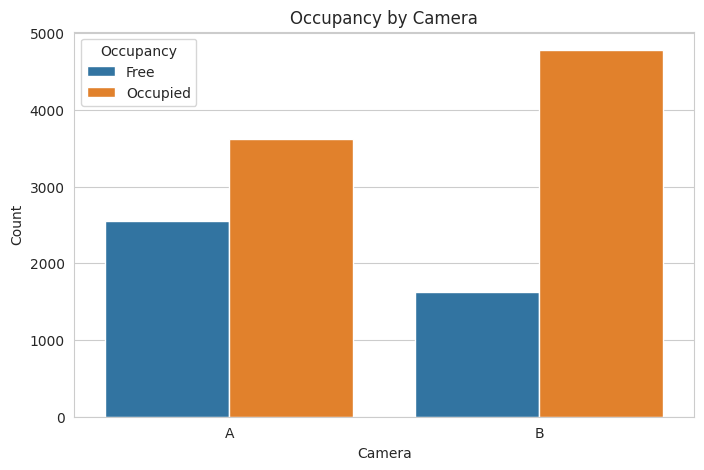

In [12]:
# Occupancy by Camera
plt.figure(figsize=(8, 5))
sns.countplot(x='camera', hue='occupancy', data=data_eda)
plt.title('Occupancy by Camera')
plt.xlabel('Camera')
plt.ylabel('Count')
plt.legend(title='Occupancy', labels=['Free', 'Occupied'])
plt.show()


From the above plot, we can observe the following:

- **Camera A:** The distribution of free and occupied slots is almost even.
- **Camera B:** There are more occupied slots than free ones.

### **Occupancy over time:** To identify any patterns or trends over the course of the day or month.

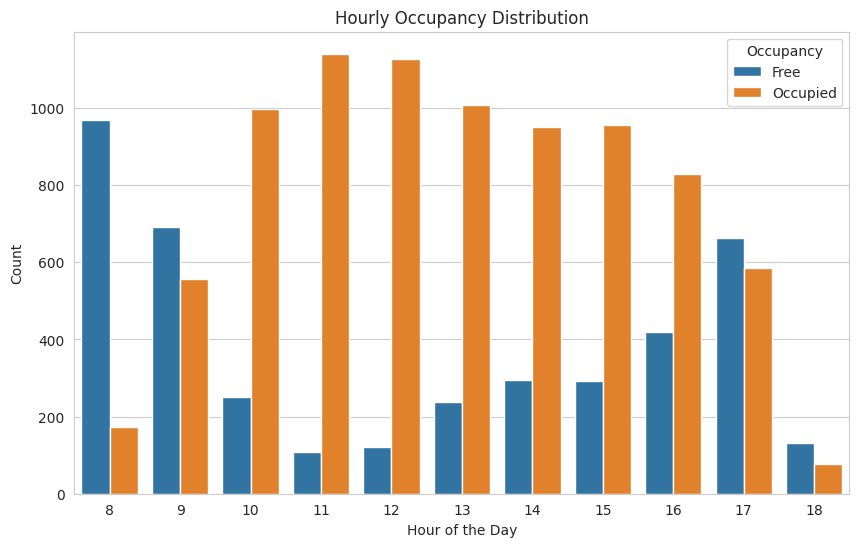

In [13]:
# Occupancy over Time (Hour-wise)
plt.figure(figsize=(10, 6))
sns.countplot(x='hour', hue='occupancy', data=data_eda)
plt.title('Hourly Occupancy Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Count')
plt.legend(title='Occupancy', labels=['Free', 'Occupied'])
plt.show()


The hourly occupancy distribution provides the following insights:

- **Morning (7-10 AM):** The number of occupied slots is slightly higher than the free ones.
- **Mid-day (10 AM-3 PM):** Occupancy reaches its peak, with significantly more occupied slots than free ones.
- **Afternoon (3-6 PM):** The number of occupied slots starts to decrease, but they still outnumber the free slots.

This pattern suggests that the parking area is busiest around mid-day, which might be due to various factors like office hours, shopping hours, or other local activities.